In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
name = "test-latency1"

df_prob = pd.read_csv(f'data/{name}-prob.log')
df_basic = pd.read_csv(f'data/{name}-basic.log')

In [3]:
# Print the size of the df
print(df_prob.shape)
print(df_basic.shape)

(3690, 17)
(3690, 17)


In [4]:
df_prob.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674739440824,3832,HTTP Request 2,200,OK,ThreadGroup2 2-1,text,True,NaN,415,274,2,3,http://10.10.1.2:1323/invoke/hash,3828,0,35
1,1674739442510,2663,HTTP Request 2,200,OK,ThreadGroup2 2-2,text,True,NaN,429,274,1,2,http://10.10.1.2:1323/invoke/hash,2663,0,3
2,1674739446003,1005,HTTP Request 2,200,OK,ThreadGroup2 2-3,text,True,NaN,412,274,3,4,http://10.10.1.2:1323/invoke/hash,1005,0,5
3,1674739446109,935,HTTP Request 2,200,OK,ThreadGroup2 2-4,text,True,NaN,404,274,2,3,http://10.10.1.2:1323/invoke/hash,935,0,1
4,1674739447512,926,HTTP Request 2,200,OK,ThreadGroup2 2-6,text,True,NaN,405,274,3,4,http://10.10.1.2:1323/invoke/hash,926,0,2


In [5]:
# Filter df based on response code
success_prob = df_prob[df_prob['responseCode'] == 200]
success_basic = df_basic[df_basic['responseCode'] == 200]

failure_prob = df_prob[df_prob['responseCode'] != 200]
failure_basic = df_basic[df_basic['responseCode'] != 200]

In [6]:
# Get the mean latency for successfull df
mean_latency_prob = success_prob['Latency'].mean()
mean_latency_basic = success_basic['Latency'].mean()
print(f"Mean latency prob: {mean_latency_prob}")
print(f"Mean latency basic: {mean_latency_basic}")

Mean latency prob: 982.10027100271
Mean latency basic: 1911.020596205962


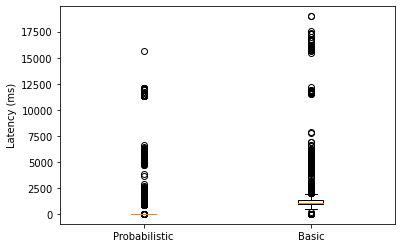

In [7]:
# Box plot for latency
plt.boxplot([success_prob['Latency'], success_basic['Latency']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Latency (ms)')
plt.show()

In [8]:
filtered_prob_t1 = success_prob[success_prob['threadName'].str.contains("ThreadGroup1", na=False)]
filtered_prob_t2 = success_prob[success_prob['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_basic_t1 = success_basic[success_basic['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_basic_t2 = success_basic[success_basic['threadName'].str.contains('ThreadGroup2', na=False)]

In [9]:
#Get only Url
url_1 = filtered_prob_t1['URL'].iloc[0]
fun_name_1 = url_1.split('/')[4]
print(f"Function 1: {fun_name_1}")
if filtered_basic_t2.size > 0:
    url_2 = filtered_basic_t2['URL'].iloc[0]
    fun_name_2 = url_2.split('/')[4]
    print(f"Function 2: {fun_name_2}")

Function 1: fib
Function 2: hash


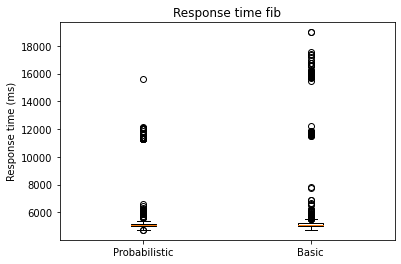

In [10]:
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

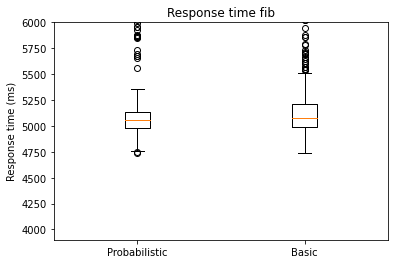

In [11]:
limit = 6000
floor = 3900

fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
ax.set_ylim(floor, limit)
plt.show()

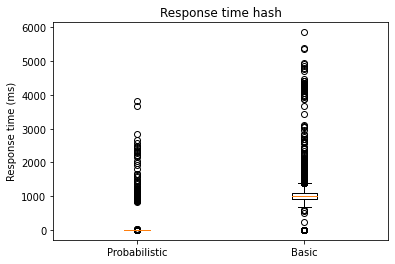

In [12]:
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()

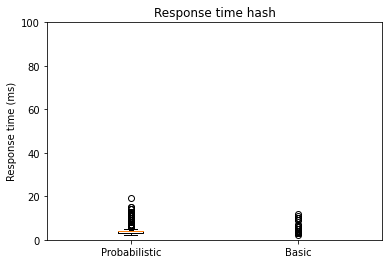

In [13]:
limit = 100

fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
ax.set_ylim(0, limit)
plt.show()